In [309]:
import json
import pandas as pd

fpaths=['/local0/Kariz/expriments/simulator/multidag/multidag_run_md_0_cmr.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_2_cmr.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_4_cmr.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_6_cmr.json', 
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_8_cmr.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_10_cmr.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_8_sjf.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_4_sjf.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_6_sjf.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_0_sjf.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_10_sjf.json',
    '/local0/Kariz/expriments/simulator/multidag/multidag_run_md_2_sjf.json',]

df_data = []
        
for fpath in fpaths:
    shared, alg = fpath.split('/')[-1].split('.')[0].split('_')[-2:]
    with open(fpath, 'r') as fd:
        raw_data = json.loads(fd.read())

        for it in raw_data:
            round_stats = raw_data[it]
            round_cached = 0
            round_total = 0
            total_runtime = 0
            for gid in round_stats:
                dag_stats = round_stats[gid]['stats']            

                total_runtime = round_stats[gid]['runtime'] if total_runtime < round_stats[gid]['runtime'] else total_runtime            
                for stat in dag_stats:
                    round_cached += stat['cached_size']
                    round_total += stat['total_size']
            df_data.append({'shared': int(shared), 'alg': alg, 
                            'total': round_total, 'cache': round_cached,
                           'round': it, 'runtime': total_runtime, 'remote': round_total -  round_cached})
      #      print(it, round_cached, round_total)
df = pd.DataFrame(df_data)
df.head(5)

agg_df = df.groupby(['shared', 'alg']).agg('sum').reset_index()
agg_df

,shared,alg,cache,remote,runtime,total
0,0,cmr,10452,31558,5338.0,42010
1,0,sjf,10242,31768,5794.0,42010
2,2,cmr,11132,30878,5615.0,42010
3,2,sjf,11085,30925,5520.0,42010
4,4,cmr,14281,27729,5721.0,42010
5,4,sjf,16400,25610,5305.0,42010
6,6,cmr,22948,19062,5076.0,42010
7,6,sjf,24040,17970,4933.0,42010
8,8,cmr,28039,13971,4335.0,42010
9,8,sjf,29162,12848,4525.0,42010


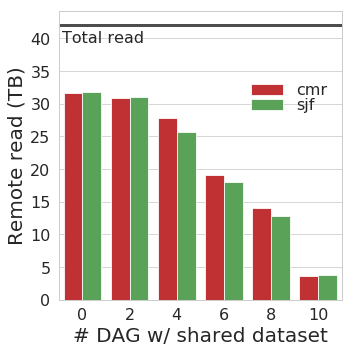

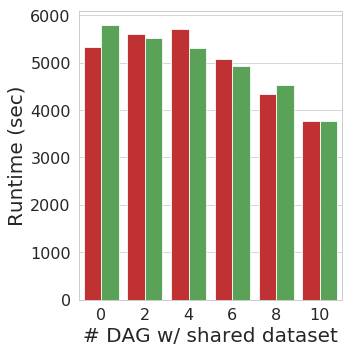

In [311]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.ticker as ticker

sns.set_style(style="whitegrid")
sns.set_context("paper")

def format_xticks(x, pos=None):
    print(x)
    return str(x) 

def format_yticks(x, pos=None):
    return str(int(x)//1000)

fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="remote", hue='alg', palette=['#d7191c', '#4daf4a'],ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Remote read (TB)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)
handles, labels = ax.get_legend_handles_labels()
#labels=['SJF + CMR', 'CMR-M + CMR']
ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=7, facecolor=None, framealpha=0, labelspacing=0,
         bbox_to_anchor=(1, 0.7))

ax.annotate('Total read',
            xy=(1.3, 41000),
            xytext=(0, 1),  # 3 points vertical offset
            textcoords="offset points",
            ha='right', va='top',
           fontsize=16)


plt.tight_layout()
fig.savefig('fig_cmrvssjf_remoteread.pdf', format='pdf', dpi=200)
fig.savefig('fig_cmrvssjf_remoteread.png', format='png', dpi=200)
plt.show()



fig, ax = plt.subplots(figsize=(5, 5))
#sns.lineplot(data=agg_df, x="shared", y="total", ax=ax)
sns.barplot(data=agg_df, x="shared", y="runtime", 
            hue='alg', palette=['#d7191c', '#4daf4a'], ax=ax, ci=None)

#ax.set_xlim(0, 9)
#ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(42010, color='#4d4d4d', linewidth=3)
ax.set_ylabel('Runtime (sec)', fontsize=20)
ax.set_xlabel('# DAG w/ shared dataset', fontsize=20)
#ax.set_xticks(['0', '2', '4', '6', '8', '10'])
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)
plt.subplots_adjust(left=0.09, bottom=0.17, right=0.995, top=0.97)


handles, labels = ax.get_legend_handles_labels()
#labels=['SJF + CMR', 'CMR-M + CMR']
ax.legend(handles=handles[0:], labels=labels[0:], fontsize=16, ncol=1,
          loc=1, facecolor=None, framealpha=0, labelspacing=0.05).remove()

plt.tight_layout()
fig.savefig('/local0/Kariz/code/ipython/fig_cmrvssjf_runtime.pdf', format='pdf', dpi=200)
fig.savefig('/local0/Kariz/code/ipython/fig_cmrvssjf_runtime.png', format='png', dpi=200)
plt.show()


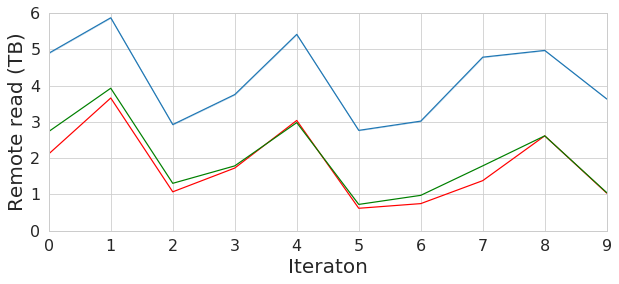

In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.ticker as ticker

sns.set_style(style="whitegrid")
sns.set_context("paper")


def format_yticks(x, pos=None):
    return str(int(x)//1000)

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=df, x="round", y="total", ax=ax)
palette = sns.color_palette("mako_r", 6)
sns.lineplot(data=df[(df['alg'] == 'sjf') & (df['shared'] == 6)], x="round",
             y="remote", color='red', ax=ax)
#palette2 = sns.color_palette("mako_r", 2)
sns.lineplot(data=df[(df['alg'] == 'cmr') & (df['shared'] == 6)], x="round",
             y="remote", color='green', ax=ax)
ax.set_xlim(0, 9)
ax.set_ylim(0, 6000)
#final_cp_df[['predicted', 'actual']].plot.bar(ax = ax)
#ax.axhline(1, color='#4d4d4d')
ax.set_ylabel('Remote read (TB)', fontsize=20)
ax.set_xlabel('Iteraton', fontsize=20)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.tick_params(labelsize=16)






In [ ]:
# read every 